In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train=pd.read_csv("D:/American express/train.csv")

In [5]:

campaign=pd.read_csv("D:/American express/campaign_data.csv")
coupon_item_mapping=pd.read_csv("D:/American express/coupon_item_mapping.csv")
Item_data=pd.read_csv("D:/American express/item_data.csv")
customer_demographics=pd.read_csv("D:/American express/customer_demographics.csv")
customer_transaction_data=pd.read_csv("D:/American express/customer_transaction_data.csv")


In [114]:
train.shape

(78369, 5)

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
dtypes: int64(5)
memory usage: 3.0 MB


In [116]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [18]:
train.campaign_id.unique().size

18

In [117]:
campaign.shape

(28, 4)

In [118]:
campaign.head()

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


## merging

In [6]:
train= train.merge(campaign, on="campaign_id", how="left")

In [120]:
train.shape

(78369, 8)

In [122]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date
0,1,13,27,1053,0,X,19/05/13,05/07/13
1,2,13,116,48,0,X,19/05/13,05/07/13
2,6,9,635,205,0,Y,11/03/13,12/04/13
3,7,13,644,1050,0,X,19/05/13,05/07/13
4,9,8,1017,1489,0,X,16/02/13,05/04/13


In [123]:
coupon_item_mapping.shape

(92663, 2)

In [25]:
coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [26]:
coupon_item_mapping.coupon_id.unique().size

1116

#### merging train and coupon_item_mapping

In [7]:
train= train.merge(coupon_item_mapping, on="coupon_id", how="left")

In [125]:
train.shape

(6420694, 9)

In [126]:
Item_data.shape

(74066, 4)

In [127]:
Item_data.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [31]:
Item_data.brand.unique().size

5528

In [32]:
Item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74066 entries, 0 to 74065
Data columns (total 4 columns):
item_id       74066 non-null int64
brand         74066 non-null int64
brand_type    74066 non-null object
category      74066 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


#### merging train and item_data

In [8]:
train= train.merge(Item_data, on="item_id", how="left")


In [130]:
train.shape

(6420694, 12)

In [131]:
customer_demographics.shape

(760, 7)

In [132]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [97]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null object
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null object
family_size       760 non-null object
no_of_children    760 non-null object
income_bracket    760 non-null object
dtypes: object(7)
memory usage: 41.6+ KB


In [37]:
431-222

209

In [38]:
customer_demographics.loc[(customer_demographics["no_of_children"]!=0), "marital_status"].isnull().sum().sum()

329

In [40]:
customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,Married,0,3,1,3
3,8,26-35,Married,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [96]:
customer_demographics[customer_demographics["marital_status"].isnull()]

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket


In [90]:
customer_demographics.loc[(customer_demographics["family_size"]=="2"),"no_of_children"].value_counts()
                        

0    175
1     13
Name: no_of_children, dtype: int64

#### Filling up values for number of children and marital status-

In [9]:
customer_demographics.loc[(customer_demographics["family_size"]=="1"),"no_of_children"] = "0"

In [10]:
customer_demographics.loc[(customer_demographics["family_size"]=="2") & 
                          (customer_demographics["marital_status"]=="Married") &
                          (customer_demographics["no_of_children"].isnull()), "no_of_children"] ="0"

In [11]:
customer_demographics.loc[(customer_demographics["marital_status"]=="Single") &
                          (customer_demographics["no_of_children"].isnull())] ="1"

In [12]:
customer_demographics.loc[(customer_demographics["family_size"]=="2") &
                          (customer_demographics["marital_status"].isnull()),"marital_status"] = "Married"

In [13]:
customer_demographics.loc[(customer_demographics["family_size"]=="2") &
                          (customer_demographics["no_of_children"].isnull())] ="0"

In [14]:
customer_demographics["marital_status"].fillna("Married", inplace=True)

In [15]:
customer_demographics.loc[(customer_demographics["family_size"]=="1") & 
                          (customer_demographics["marital_status"].isnull()),"marital_status"] = "Single"

In [45]:
customer_demographics.marital_status.value_counts()

Married    646
Single     114
Name: marital_status, dtype: int64

In [140]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
customer_id       760 non-null object
age_range         760 non-null object
marital_status    760 non-null object
rented            760 non-null object
family_size       760 non-null object
no_of_children    760 non-null object
income_bracket    760 non-null object
dtypes: object(7)
memory usage: 41.6+ KB


##### merging

In [16]:
train= train.merge(customer_demographics, on="customer_id", how="left")

In [128]:
customer_transaction_data.shape

(1324566, 7)

In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420694 entries, 0 to 6420693
Data columns (total 18 columns):
id                   int64
campaign_id          int64
coupon_id            int64
customer_id          int64
redemption_status    int64
campaign_type        object
start_date           object
end_date             object
item_id              int64
brand                int64
brand_type           object
category             object
age_range            object
marital_status       object
rented               float64
family_size          object
no_of_children       object
income_bracket       float64
dtypes: float64(2), int64(7), object(9)
memory usage: 930.7+ MB


In [142]:
train.shape

(6420694, 18)

In [143]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,item_id,brand,brand_type,category,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,13,27,1053,0,X,19/05/13,05/07/13,24775,1636,Established,Grocery,46-55,Married,0,1,0,5
1,1,13,27,1053,0,X,19/05/13,05/07/13,14958,1636,Established,Grocery,46-55,Married,0,1,0,5
2,1,13,27,1053,0,X,19/05/13,05/07/13,40431,1636,Established,Grocery,46-55,Married,0,1,0,5
3,1,13,27,1053,0,X,19/05/13,05/07/13,20749,1636,Established,Grocery,46-55,Married,0,1,0,5
4,1,13,27,1053,0,X,19/05/13,05/07/13,56860,1636,Established,Grocery,46-55,Married,0,1,0,5


In [17]:
train.drop("id",1,inplace=True)

In [140]:
train.coupon_id.unique().size

866

In [149]:
# columns=train.drop(['coupon_id','customer_id','start_date','end_date'],1).columns
# print(columns)
# plt.figure(figsize=(15,25))
# for i in range(0,columns.size):
    
#     plt.subplot(columns.size,1,i+1)
#     sns.countplot(x=train[columns[i]], hue=train["redemption_status"])
#     plt.xlabel(columns[i])

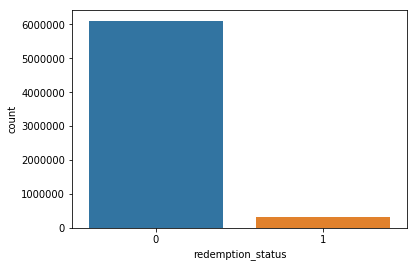

In [156]:
sns.countplot(x=train["redemption_status"])

In [157]:
train["redemption_status"].value_counts()

0    6108162
1     312532
Name: redemption_status, dtype: int64

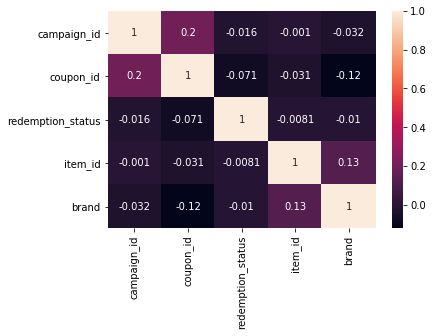

In [145]:
sns.heatmap(train.corr(), annot=True)

In [104]:
train.head()

,campaign_id,coupon_id,customer_id,redemption_status,item_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,13,27,1053,0,24775,46-55,Single,0,1,0,5
1,13,27,1053,0,14958,46-55,Single,0,1,0,5
2,13,27,1053,0,40431,46-55,Single,0,1,0,5
3,13,27,1053,0,20749,46-55,Single,0,1,0,5
4,13,27,1053,0,56860,46-55,Single,0,1,0,5


In [146]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


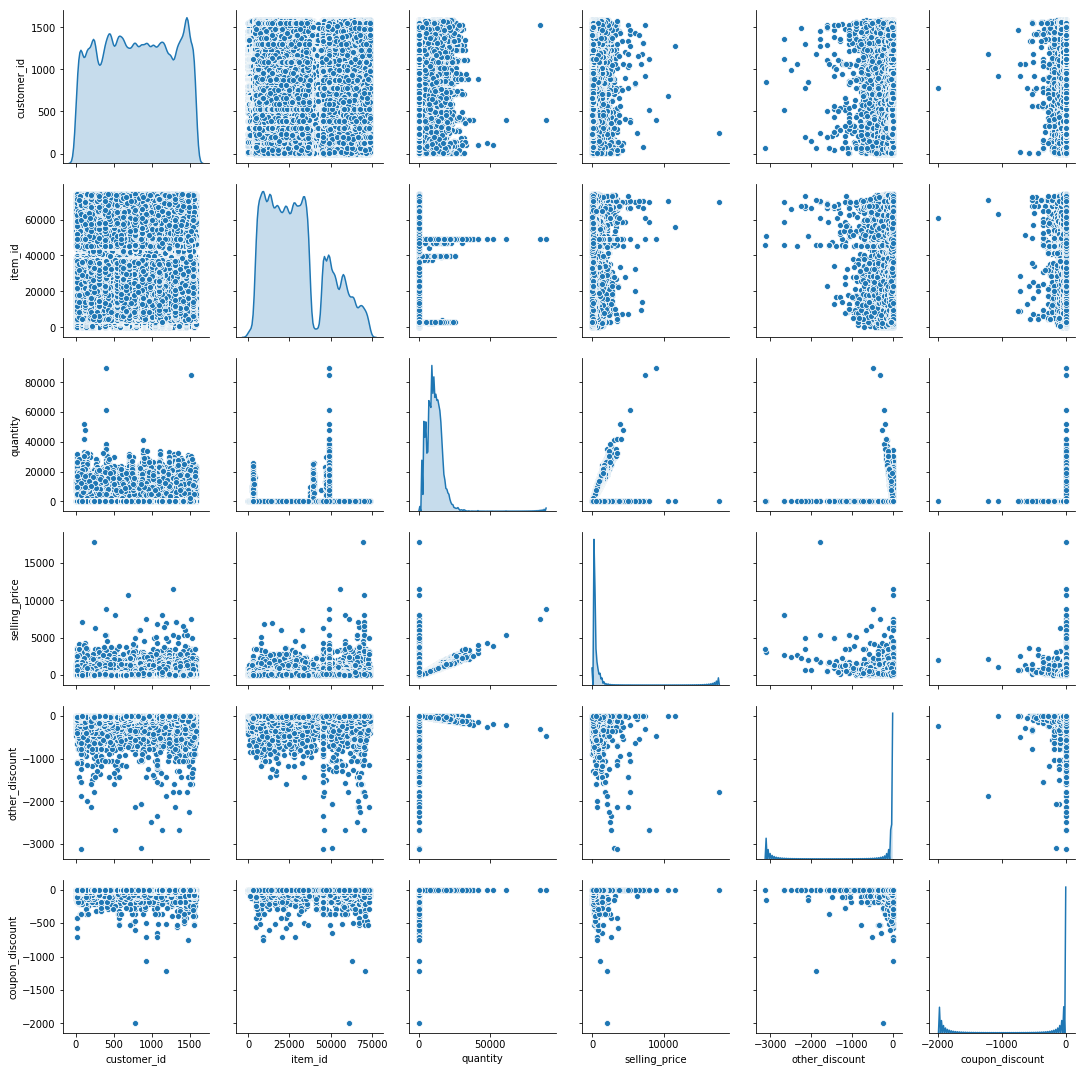

In [152]:
sns.pairplot(customer_transaction_data, diag_kind="kde")

In [149]:
train.redemption_status.value_counts()

0    6108162
1     312532
Name: redemption_status, dtype: int64

## Treating imbalance in data --------------------------

In [21]:

# Lets shuffle the data before creating the subsamples

train = train.sample(frac=1)

# amount of disease classes 572 rows.
redempted_train = train.loc[train['redemption_status'] == 1]
not_redemted_train = train.loc[train['redemption_status'] == 0][:312532]

distributed_df = pd.concat([redempted_train, not_redemted_train])

# Shuffle dataframe rows
new_df = distributed_df.sample(frac=1, random_state=42)

new_df.shape

(625064, 17)

In [155]:
customer_transaction_data.shape

(1324566, 7)

In [22]:
new_df.to_csv("train_ugsuiasduasdf.csv", index=False)

In [20]:
new_df=new_df.merge(customer_transaction_data, on="customer_id", how="left")

MemoryError: 

In [ ]:
new_df.shape